In [2]:
import torch
import torch.nn as nn
import numpy as np
from train_model import train, print_summary
from prepare_data import create_dataloaders
import torchvision

In [3]:
dataset_dir = "../datasets/"

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [5]:
vit_l_16_weights = torchvision.models.ViT_L_16_Weights.IMAGENET1K_V1
vit_l_16_model = torchvision.models.vit_l_16(vit_l_16_weights).to(device=device)

/home/emir/miniconda3/envs/mlptorch/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


In [10]:
vit_transforms = vit_l_16_weights.transforms()
vit_transforms.crop_size = [384]
vit_transforms.resize_size = [402]

In [11]:
vit_transforms

ImageClassification(
    crop_size=[384]
    resize_size=[402]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [12]:
train_data = torchvision.datasets.Food101(root=dataset_dir, split="train", transform=vit_transforms, download=False)
test_data = torchvision.datasets.Food101(root=dataset_dir, split="test", transform=vit_transforms, download=False)

In [19]:
len(train_data), len(test_data)

(75750, 25250)

so foodvision101 too big in order to fit well going to use vit-b

In [27]:
vit_b_16_weights = torchvision.models.ViT_B_16_Weights.IMAGENET1K_V1
vit_b_16_model = torchvision.models.vit_b_16(vit_b_16_weights).to(device=device)

/home/emir/miniconda3/envs/mlptorch/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


In [31]:
vit_transforms = vit_b_16_weights.transforms()
vit_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [32]:
train_data = torchvision.datasets.Food101(root=dataset_dir, split="train", transform=vit_transforms, download=False)
test_data = torchvision.datasets.Food101(root=dataset_dir, split="test", transform=vit_transforms, download=False)

In [30]:
print_summary(model=vit_b_16_model, input_size=(32, 3, 224, 224))

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [32, 3, 224, 224]    [32, 1000]           768                  True
├─Conv2d (conv_proj)                                         [32, 3, 224, 224]    [32, 768, 14, 14]    590,592              True
├─Encoder (encoder)                                          [32, 197, 768]       [32, 197, 768]       151,296              True
│    └─Dropout (dropout)                                     [32, 197, 768]       [32, 197, 768]       --                   --
│    └─Sequential (layers)                                   [32, 197, 768]       [32, 197, 768]       --                   True
│    │    └─EncoderBlock (encoder_layer_0)                   [32, 197, 768]       [32, 197, 768]       7,087,872            True
│    │    └─EncoderBlock (encoder_layer_1)                   [32, 197, 768]       [32, 197, 76

In [34]:
train_dataloader, test_dataloader, class_names = create_dataloaders(train_data=train_data, test_data=test_data, batch_size=32, data_folder_imported=True, transform=vit_transforms)

In [38]:
len(train_dataloader), len(test_dataloader)

(2368, 790)

In [35]:
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 223.5, 223.5, -0.5)

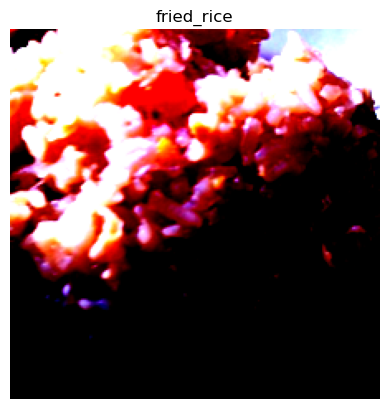

In [40]:
image_batch, label_batch = next(iter(train_dataloader))
image, label = image_batch[0], label_batch[0]
import matplotlib.pyplot as plt
plt.imshow(image.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False)

In [33]:
for parameter in vit_b_16_model.parameters():
    parameter.requires_grad = False

In [36]:
vit_b_16_model.heads = nn.Sequential(nn.Linear(in_features=768, out_features=len(class_names)))
print_summary(vit_b_16_model, input_size=(32, 3, 224, 224))

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [32, 3, 224, 224]    [32, 101]            768                  Partial
├─Conv2d (conv_proj)                                         [32, 3, 224, 224]    [32, 768, 14, 14]    (590,592)            False
├─Encoder (encoder)                                          [32, 197, 768]       [32, 197, 768]       151,296              False
│    └─Dropout (dropout)                                     [32, 197, 768]       [32, 197, 768]       --                   --
│    └─Sequential (layers)                                   [32, 197, 768]       [32, 197, 768]       --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [32, 197, 768]       [32, 197, 768]       (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [32, 197, 768]       [32, 

ViT heads changed √
Dataloaders created √
Transformers applied √
Cosine learning rate decay√
optimizer sgd with lr=0.001, momentum=0.9√
loss_fn = crossentropy√


In [ ]:
optimizer = torch.optim.SGD(momentum=0.9, lr=0.001, params=vit_b_16_model.parameters())
loss_fn = nn.CrossEntropyLoss()
lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(T_max=500, optimizer=optimizer, eta_min=0.0001)
vit_b_food_101_results = train(model=vit_b_16_model,
                                epochs=14,
                                device=device,
                                train_dataloader=train_dataloader,
                                test_dataloader=test_dataloader,
                                optimizer=optimizer,
                                lr_scheduler=lr_scheduler,
                                loss_fn=loss_fn)